# Dask Demo

In [1]:
import numpy as np
import pandas as pd
from dask import dataframe as dd

# dask.dataframe

In [2]:
df = pd.DataFrame({
    'X': np.arange(10),
    'Y': np.arange(10, 20),
    'Z': np.arange(20, 30)},
    index=list('abcdefghij'))

In [3]:
df 

,X,Y,Z
a,0,10,20
b,1,11,21
c,2,12,22
d,3,13,23
e,4,14,24
f,5,15,25
g,6,16,26
h,7,17,27
i,8,18,28
j,9,19,29


In [4]:
ddf = dd.from_pandas(df, npartitions=2)

In [5]:
ddf

,X,Y,Z
npartitions=2,,,
a,int64,int64,int64
f,...,...,...
j,...,...,...


In [6]:
ddf.divisions

('a', 'f', 'j')

In [7]:
ddf.npartitions

2

In [8]:
ddf.compute()

,X,Y,Z
a,0,10,20
b,1,11,21
c,2,12,22
d,3,13,23
e,4,14,24
f,5,15,25
g,6,16,26
h,7,17,27
i,8,18,28
j,9,19,29


In [9]:
ddf * 2

,X,Y,Z
npartitions=2,,,
a,int64,int64,int64
f,...,...,...
j,...,...,...


In [11]:
(ddf * 2).compute()

,X,Y,Z
a,0,20,40
b,2,22,42
c,4,24,44
d,6,26,46
e,8,28,48
f,10,30,50
g,12,32,52
h,14,34,54
i,16,36,56
j,18,38,58


In [12]:
ddf.mean()

Dask Series Structure:
npartitions=1
X    float64
Z        ...
dtype: float64
Dask Name: dataframe-mean, 9 tasks

In [13]:
ddf.mean().compute()

X     4.5
Y    14.5
Z    24.5
dtype: float64

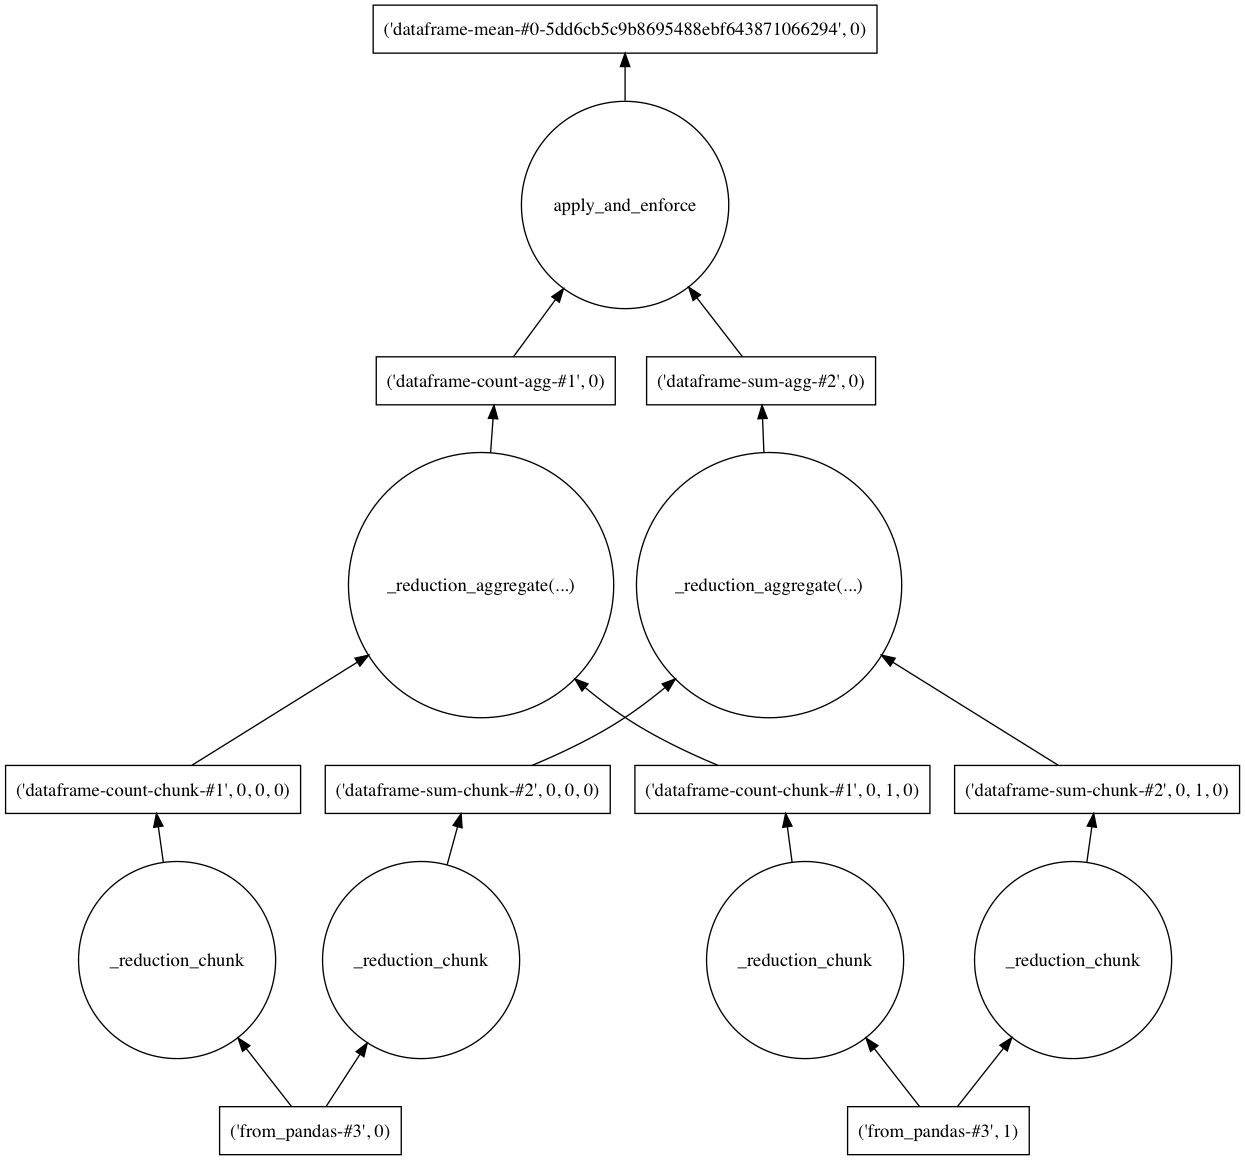

In [14]:
ddf.mean().visualize()

In [15]:
ddf = ddf - ddf.mean()
ddf = ddf / ddf.std()

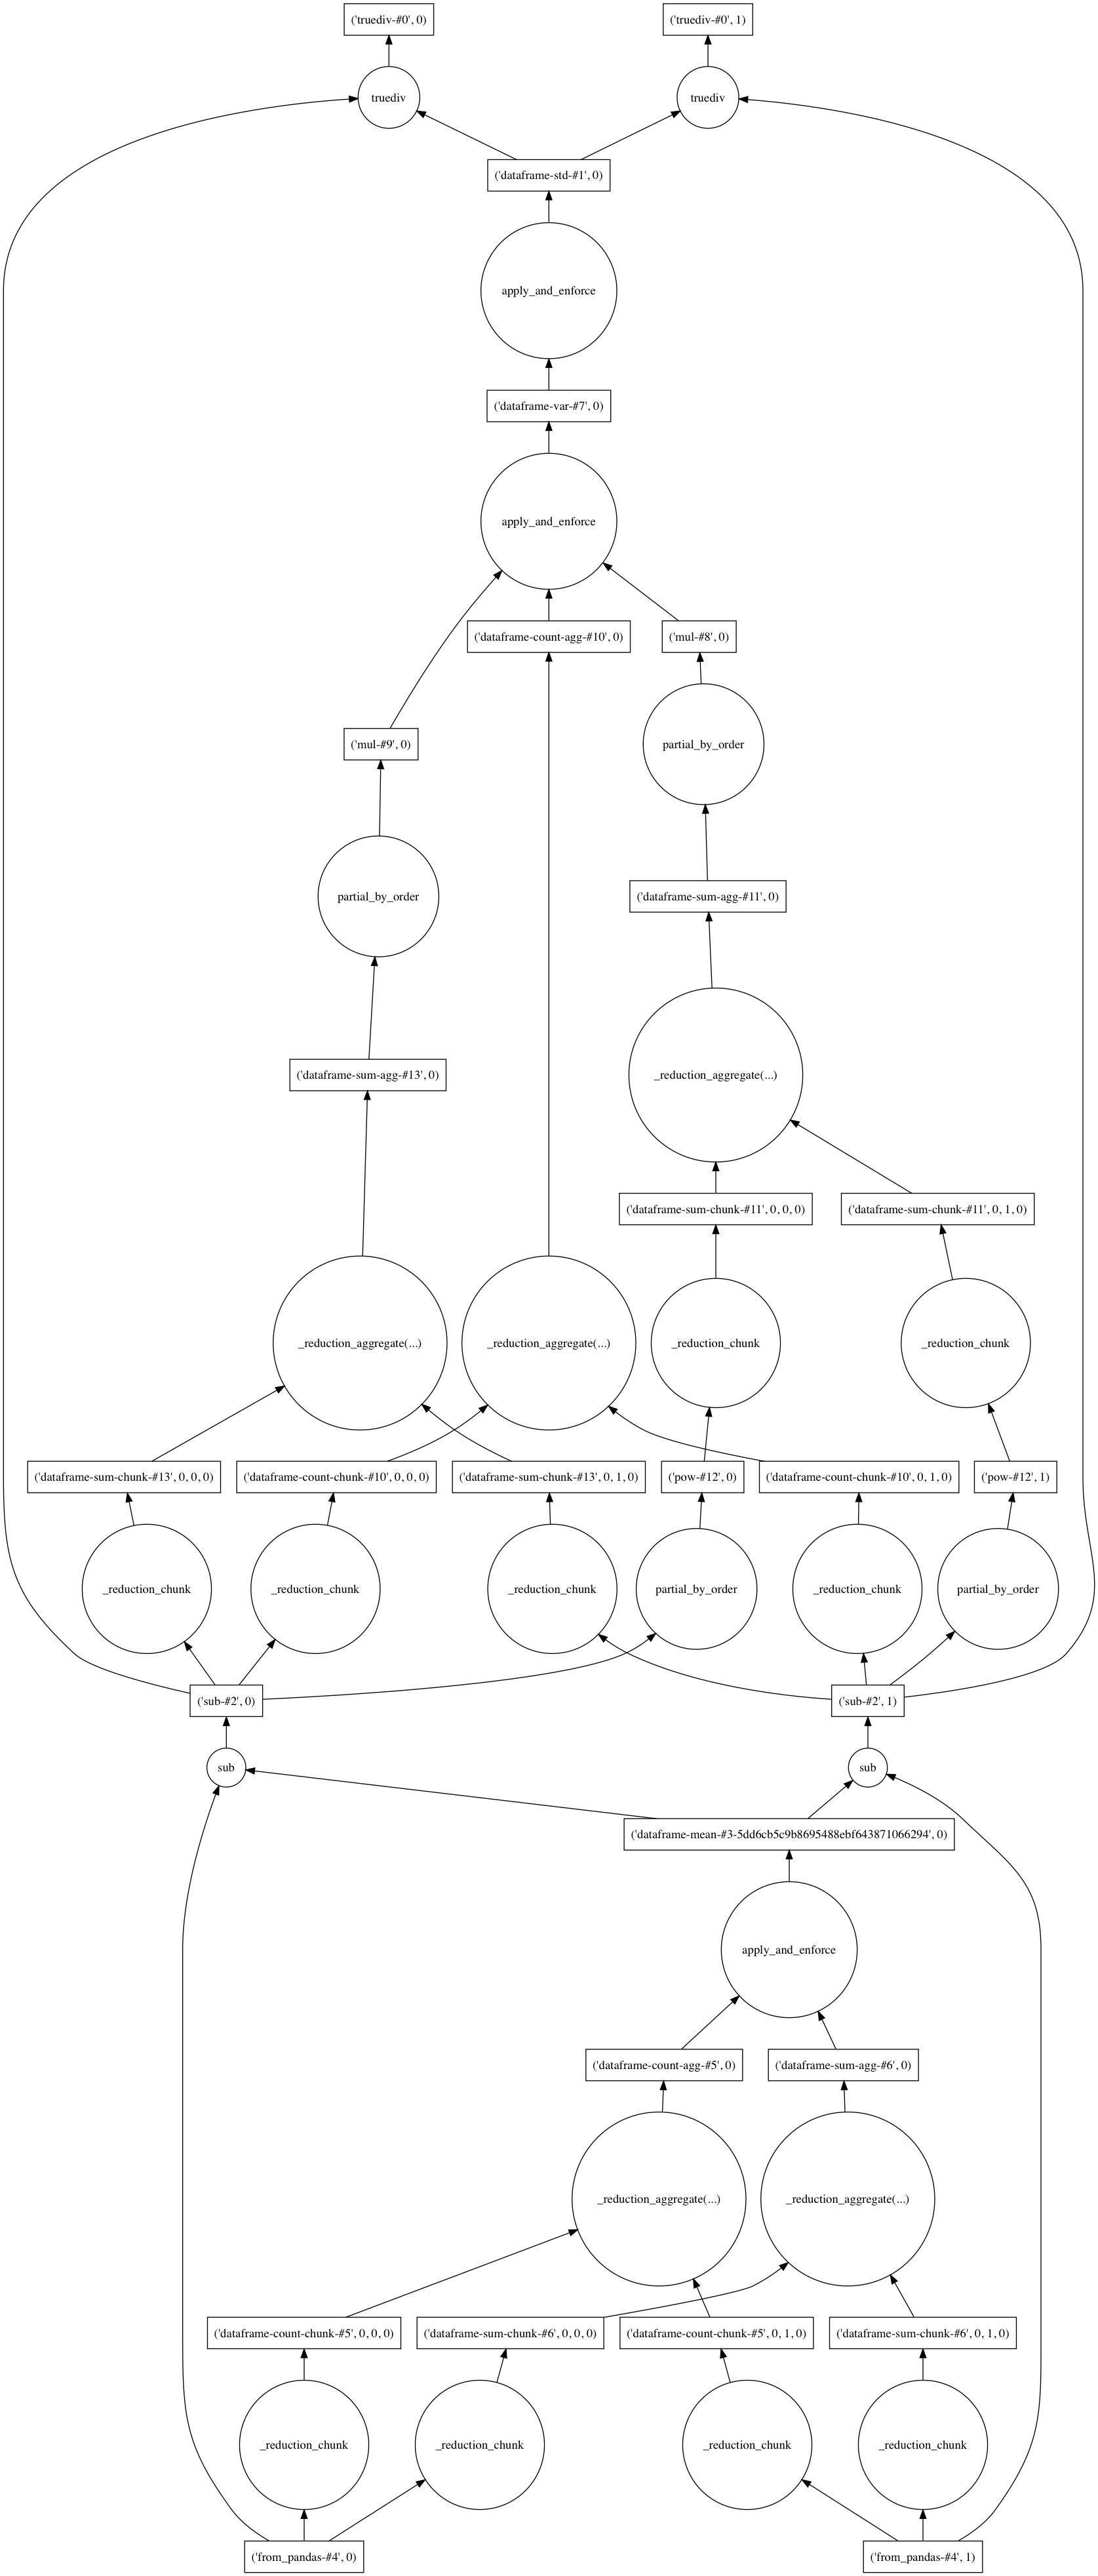

In [16]:
ddf.visualize()

In [17]:
ddf.compute()

,X,Y,Z
a,-1.486301,-1.486301,-1.486301
b,-1.156012,-1.156012,-1.156012
c,-0.825723,-0.825723,-0.825723
d,-0.495434,-0.495434,-0.495434
e,-0.165145,-0.165145,-0.165145
f,0.165145,0.165145,0.165145
g,0.495434,0.495434,0.495434
h,0.825723,0.825723,0.825723
i,1.156012,1.156012,1.156012
j,1.486301,1.486301,1.486301


# dask.delayed

In [18]:
from dask import delayed

In [19]:
from time import sleep

def add_slowly(x,y):
    sleep(1)
    return x+y

def incre_slowly(x):
    sleep(1)
    return x+1

def sum_slowly(X):
    sleep(1)
    return sum(X)

In [20]:
%%time

data = np.arange(1, 5)
A = [incre_slowly(i) for i in data]
B = [add_slowly(a,10) for a in A]

score = sum_slowly(A) + sum_slowly(B)
print(score)

68
CPU times: user 8.92 ms, sys: 3.01 ms, total: 11.9 ms
Wall time: 10 s


In [21]:
%%time

data = np.arange(1, 5)
A = [delayed(incre_slowly)(i) for i in data]
B = [delayed(add_slowly)(b,10) for b in A]

score = delayed(sum_slowly)(A) + delayed(sum_slowly)(B)
print(score)

Delayed('add-3181f524ff072b209bc65838e0a7aea4')
CPU times: user 1.17 ms, sys: 318 µs, total: 1.49 ms
Wall time: 1.34 ms


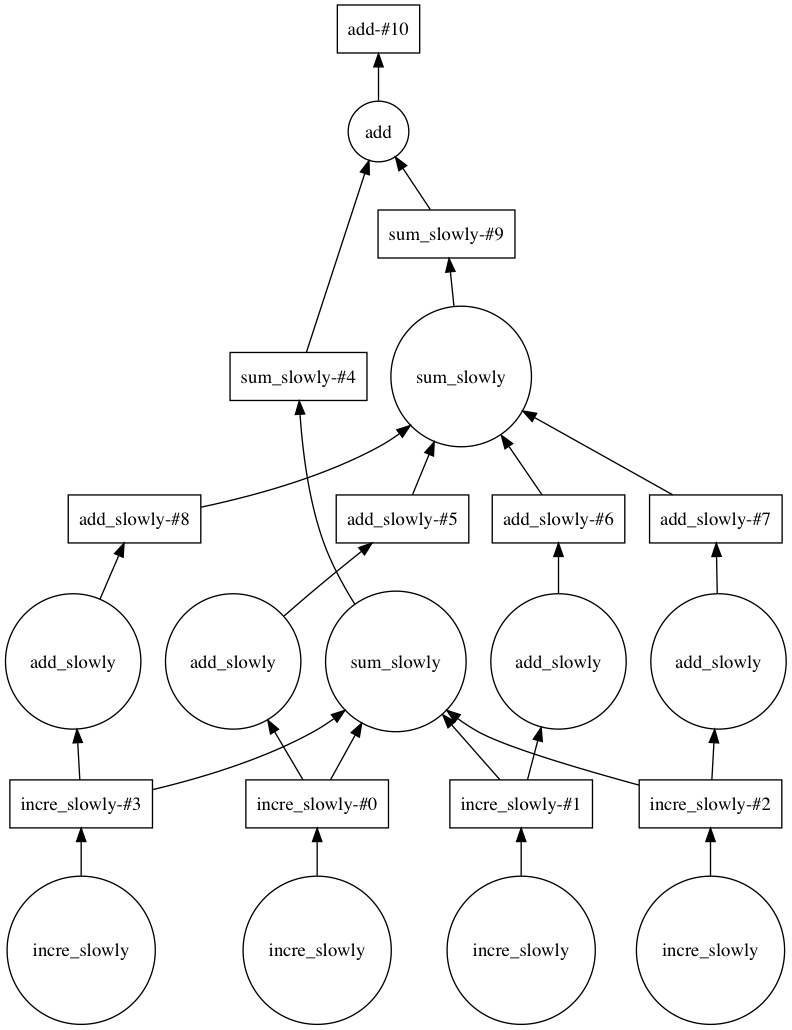

In [22]:
score.visualize()

In [23]:
%%time
score.compute()

CPU times: user 7.96 ms, sys: 2.97 ms, total: 10.9 ms
Wall time: 4.01 s


68